# 複数のcsvを時系列順に統合し，一つのcsvファイルとして書き出すプログラム

### 使用方法
- csvのファイル名で昇順並び替えをする．
- 各csvファイルに見出しがある場合は引数のskiprowsを調整する．

- input_directory に参照したいフォルダパスを入力
- そのフォルダ内に[output]というフォルダを作成
- output_file の引数2に合成したcsvファイルの保存する名前を入力

In [1]:
import pandas as pd
import os
import csv

def combine_csv_files(input_directory, output_file, skip_rows,max_colums):
    # ファイルのリストを取得
    csv_files = [f for f in os.listdir(input_directory) if f.endswith('.csv')]
    
    # DataFrameのリスト
    df_list = []

    for file in sorted(csv_files):  # ファイル名が連番だと仮定してソート
        file_path = os.path.join(input_directory, file)
        
        # CSVファイルを読み込んで上{skip_rows}行をスキップ
        df = pd.read_csv(file_path, skiprows=skip_rows, encoding='UTF-8', header=None)
        
        # 欠損値を埋める (不足している列には空文字を埋める)
        max_cols = max_colums  # 最大列数を指定（適切に調整）
        df = df.reindex(columns=range(max_cols), fill_value='')
        
        # DataFrameのリストに追加
        df_list.append(df)
    
    # DataFrameを結合
    combined_df = pd.concat(df_list, ignore_index=True)  # インデックスをリセット

    # 出力ディレクトリが存在しない場合は作成
    output_dir = os.path.dirname(output_file)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 結合結果をCSVとして保存
    combined_df.to_csv(output_file, index=False, encoding='UTF-8')


    ###########################
    # 以下，csvの見出しの1行目を消すため，書き出したCSVを修正
    rows = []
    with open(output_file, encoding="UTF-8") as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            # １行目（見出し）は飛ばす
            if csv_reader.line_num == 1:
                continue
            rows.append(row)

    # CSV書き込み
    with open(
        output_file, "w", newline="", encoding="UTF-8"
    ) as csv_file:
        csv_writer = csv.writer(csv_file)
        for row in rows:
            csv_writer.writerow(row)
    ############################

input_directory = os.path.join('./kurashiki/raw')
output_file = os.path.join('./kurashiki/raw/combined_output.csv')

combine_csv_files(input_directory, output_file, skip_rows=1,max_colums=7)

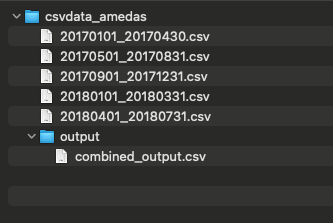

イメージ